In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Simul import get_m1_m2,get_RQ_MOA,get_R_simul

In [7]:
R1,R2,Q1,Q2,t = get_RQ_MOA(1,0.6,alpha=1.2,beta=0.6,eta1=0.2,eta2=0.05,t_end=10000)

In [4]:
N = 500

In [8]:
R1_s,R2_s,Q1_s,Q2_s,t = get_R_simul(N,alpha=1.2,beta=0.6,eta1=0.2,eta2=0.05,t_end=10000)

0.6000789688722219 -4.4993560754302483e-05


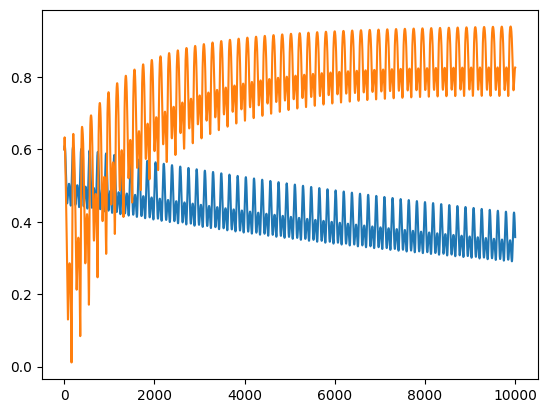

In [9]:
plt.plot(t,Q2)
plt.plot(t,Q2_s)

In [2]:
N = 1000
eta1 = 0.1
eta2 = 0.0
Theta = get_m1_m2(N,eta1,eta2)

0.5984726435182067 -1.4247122105693724e-16


In [ ]:
A1 = 1
A2 = np.sqrt(0.6)
shift = 0.0 * np.pi

a1 =  A1 *np.exp(0j)
b1 =  a1 * np.exp(np.pi*1j)
c1 = a1**2
a2 =  A2*np.exp(shift*1.0j)
b2 =  a2* np.exp(np.pi*1j)
c2 = a2**2

Zs = RK4(dZ2_dt,np.array([a1.real,a1.imag,b1.real,b1.imag,c1.real,c1.imag,a2.real,a2.imag,b2.real,b2.imag,c2.real,c2.imag]),t,args=(alpha,beta,eta1,eta2))#[::1000]
a1s,b1s,c1s,a2s,b2s,c2s = to_complex2(Zs)

RZ1 = 1/2 * (np.conj(a1s)+np.conj(b1s)) + eta1/2 * (np.conj(a1s)-np.conj(b1s))
QZ1 = 1/2 * (np.conj(a1s)**2+np.conj(b1s)**2) + eta1/2 * (np.conj(a1s)**2-np.conj(b1s)**2)
RZ2 = 1/2 * (np.conj(a2s)+np.conj(b2s)) + eta2/2 * (np.conj(a2s)-np.conj(b2s))
QZ2 = 1/2 * (np.conj(a2s)**2+np.conj(b2s)**2) + eta2/2 * (np.conj(a2s)**2-np.conj(b2s)**2)

R1s = np.abs(RZ1)
R2s = np.abs(RZ2)
Q1s = np.abs(QZ1)
Q2s = np.abs(QZ2)

In [2]:
eta1 = 0.2
N = 500

In [4]:
Peak_0_N = int((1/2 *(1 + eta1))*N)
Peak_pi_N = N - Peak_0_N
theta1 = np.r_[np.zeros(Peak_0_N),np.pi*np.ones(Peak_pi_N)]